<a href="https://colab.research.google.com/github/irfanrahman987-ari/cvpr/blob/main/MID/KNNmidassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and download the dataset

In [ ]:
import kagglehub

dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Dataset downloaded successfully from web.')

Using Colab cache for faster access to the 'animal-image-datasetdog-cat-and-panda' dataset.
Dataset downloaded successfully from web.


100%|██████████| 376M/376M [00:08<00:00, 47.1MB/s]

Extracting files...


Dataset downloaded successfully from web.


Dataset loading and preprocessing

In [ ]:

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [26]:
import os
import kagglehub

# Re-download (cached) to get the base path correctly
base_dataset_path = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

# Construct the correct path to the animals directory
# Assuming the 'animals' directory is directly under the base_dataset_path
dataset = os.path.join(base_dataset_path, "animals")

print(os.listdir(dataset))

Using Colab cache for faster access to the 'animal-image-datasetdog-cat-and-panda' dataset.
['animals', 'images', 'dogs', 'panda', 'cats']


In [27]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [30]:
import os
import kagglehub

# Re-download (cached) to get the base path correctly
base_dataset_path = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

# Set dataset to the correct path where animal categories are located
# Based on previous successful output from cell wHQoT5B82t3x, this should be base_dataset_path/animals/animals
dataset = os.path.join(base_dataset_path, "animals", "animals")

print(os.listdir(dataset))

Using Colab cache for faster access to the 'animal-image-datasetdog-cat-and-panda' dataset.
['dogs', 'panda', 'cats']


In [31]:
# This cell caused the dataset path to be incorrect. Removing its content.

In [33]:
categories = os.listdir(dataset)
result = []
for category in categories:
    path = os.path.join(dataset, category)
    files = os.listdir(path)
    result.append(files)

print(result)

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

Taking 100 images from each category




In [34]:
train_data = []
max_images_per_class = 100

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)

    image_files = os.listdir(path)[:max_images_per_class]

    for img in tqdm(image_files, desc=f"Loading {category}"):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)

        if img_bgr is None:
            continue

        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (32, 32))
        train_data.append((img_array, label))




Loading cats: 100%|██████████| 100/100 [00:01<00:00, 60.40it/s]


In [35]:
print(f"Total loaded samples: {len(train_data)}")

Total loaded samples: 300


In [36]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [37]:
np.random.shuffle(train_data)


print([train_data[i][1] for i in range(15)])

[1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2]


Visualization

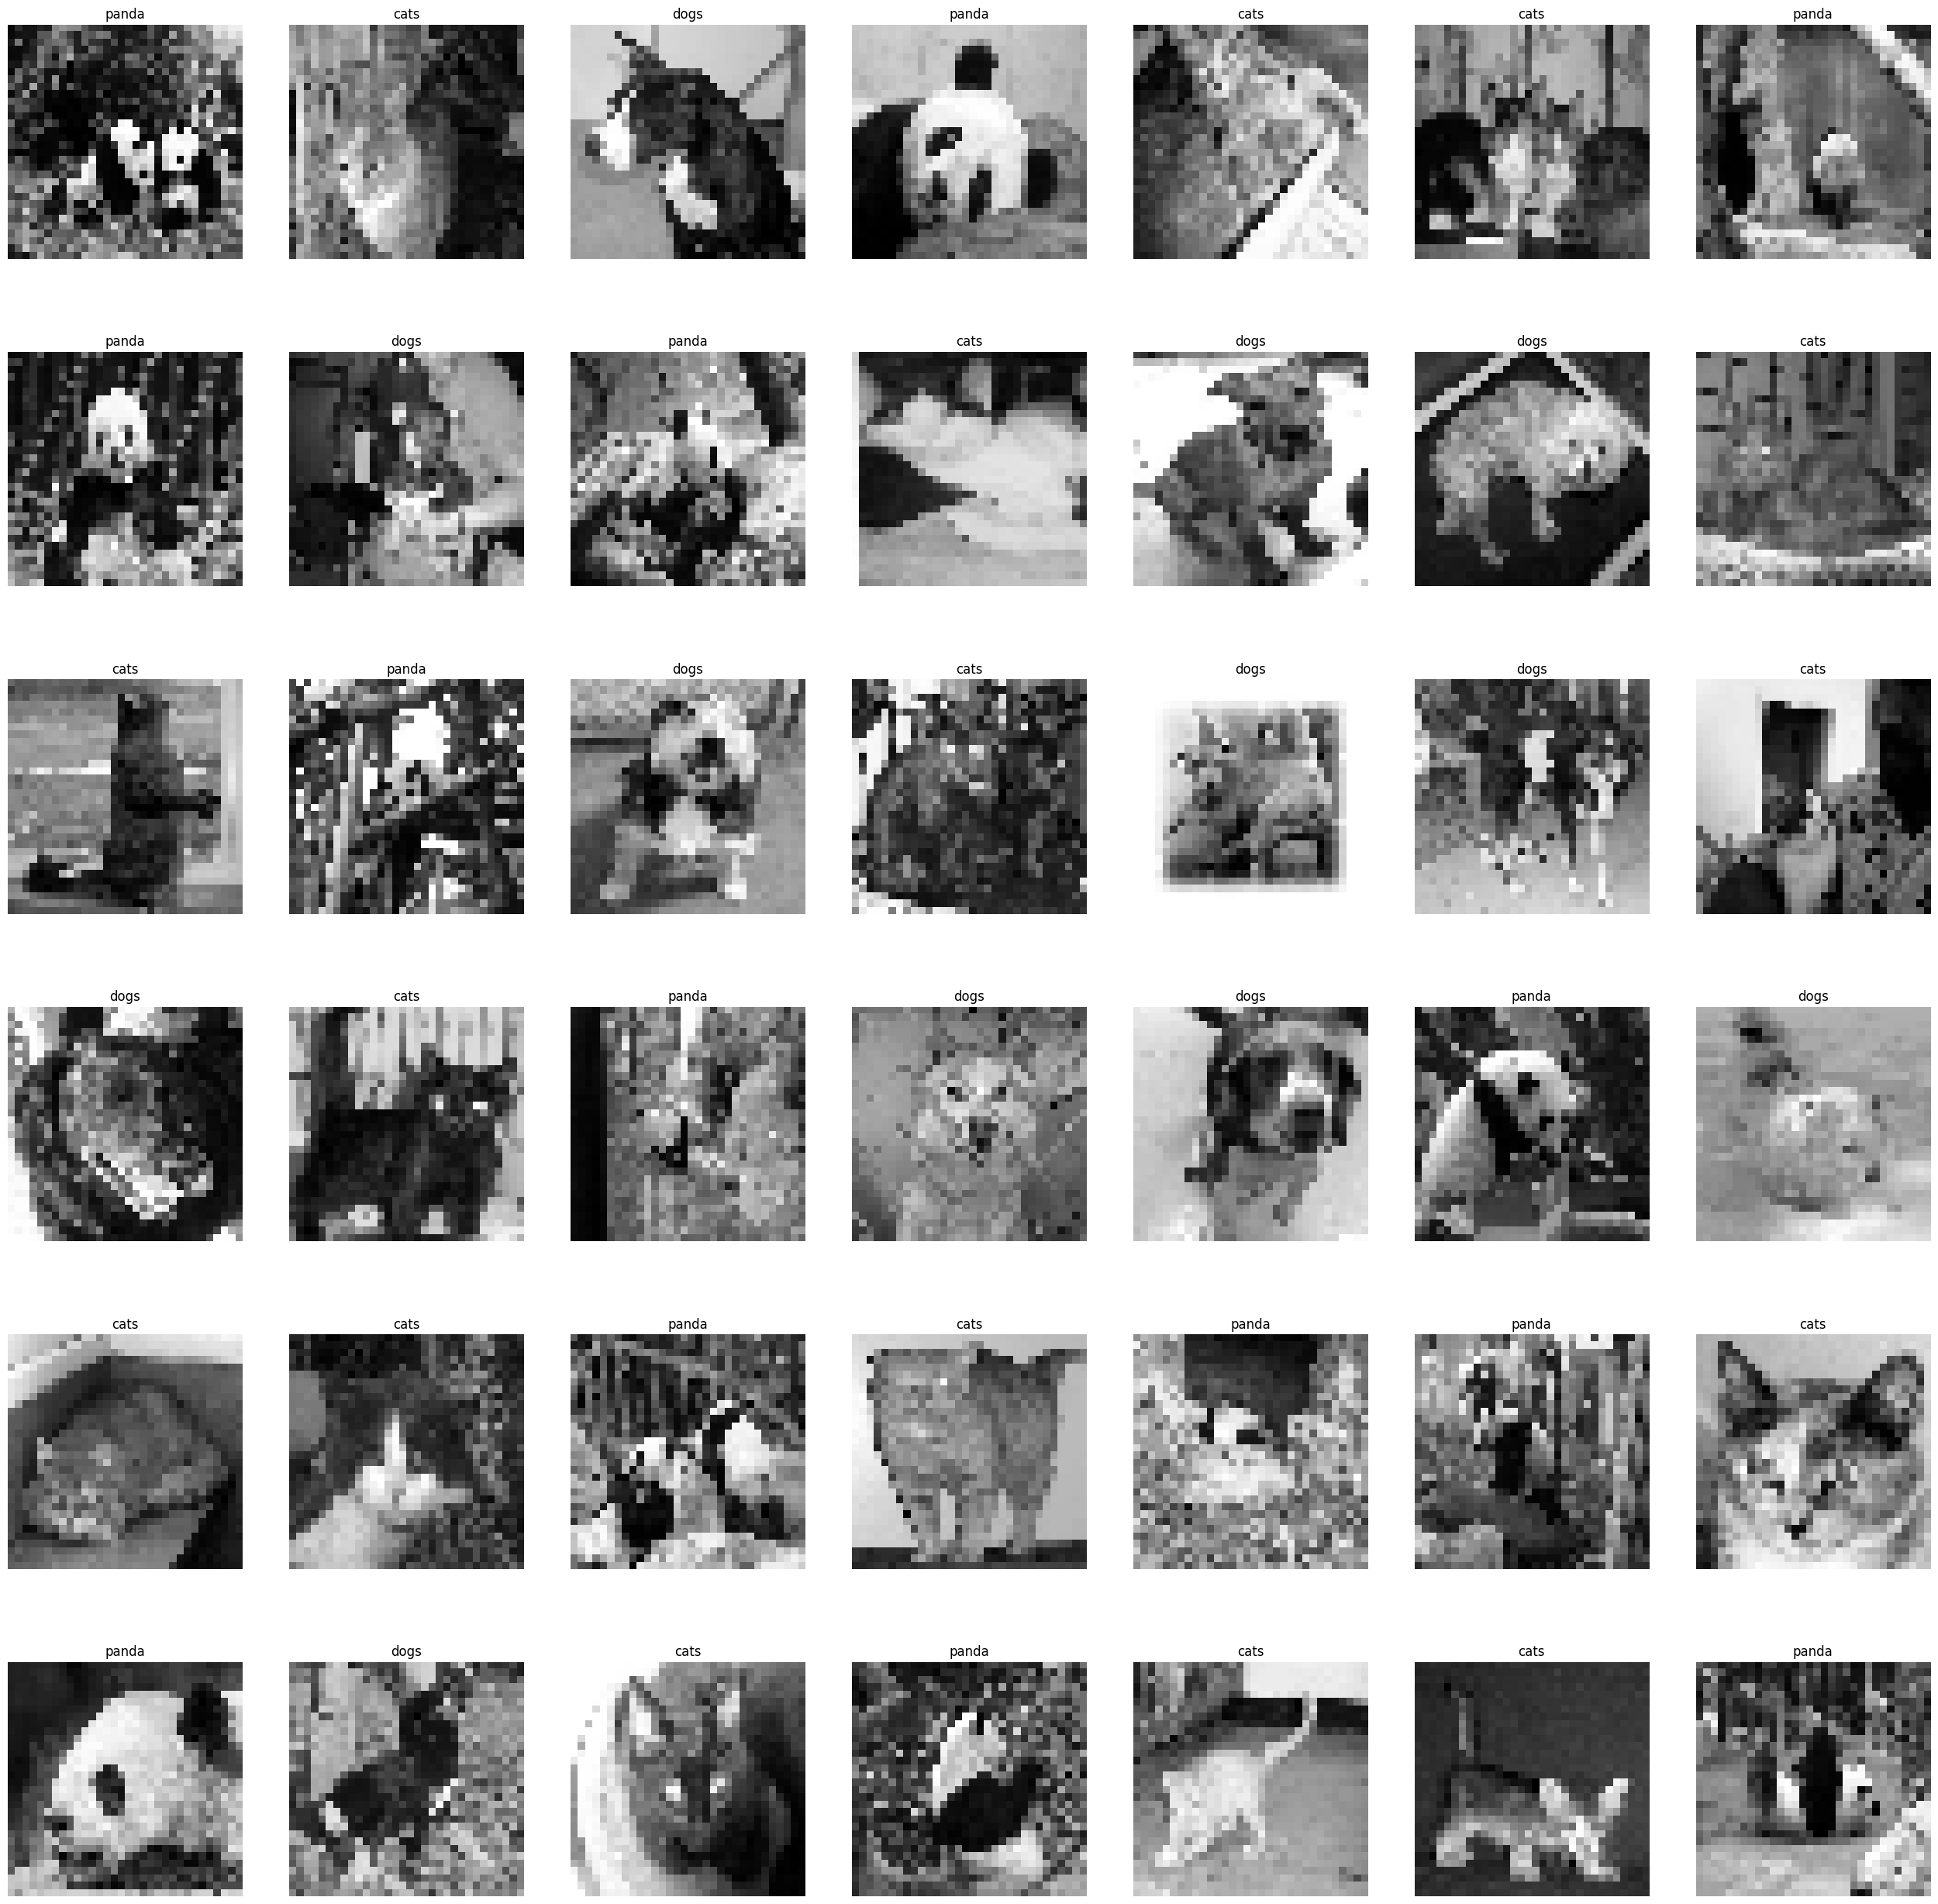

In [38]:

fig, axes = plt.subplots(6, 7, figsize=(32, 32))
label_names = ['dogs', 'panda', 'cats']
for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label_names[label])
    ax.axis('off')

plt.show()



Cross-Validation

In [39]:
folds = [train_data[i::5] for i in range(5)]
len(folds)

5

In [40]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}:")
    print(f"Labels: {labels}")
    print(f"Count: {len(fold)}")
    print(f" ")

Fold 1:
Labels: [1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2]
Count: 60
 
Fold 2:
Labels: [2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1]
Count: 60
 
Fold 3:
Labels: [0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1]
Count: 60
 
Fold 4:
Labels: [1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0]
Count: 60
 
Fold 5:
Labels: [2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 

Calculating Euclidean Distance

In [43]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))

Calculating Manhattan Distance

In [44]:
def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

kNN Prediction

In [45]:
def knn_prediction(distances, k=1):
    labels = []
    for i in range(k):
        _, label = distances[i]
        labels.append(label)


    label_freq = {}
    for label in labels:
        if label in label_freq:
            label_freq[label] += 1
        else:
            label_freq[label] = 1


    most_common_label = max(label_freq, key=label_freq.get)

    return most_common_label


Euclidean Distance k-Nearest Neighbors (kNN) Cross-Validation with Accuracy

In [46]:
def evaluate_fold(train_set, valid_set, k):
    predictions = []
    for valid_img in valid_set:
        l2_distances = [
            (l2_distance(valid_img[0], train_img[0]), train_img[1])
            for train_img in train_set
        ]
        l2_distances.sort()
        predicted_label = knn_prediction(l2_distances, k)
        correct = int(predicted_label == valid_img[1])
        predictions.append(correct)
    return sum(predictions) / len(predictions)

def cross_validate_knn(folds, k_values):
    fold_accuracies_all = []
    avg_accuracies = []

    for k in k_values:
        print(f"Evaluating K = {k}")
        fold_accuracies = []

        for i in reversed(range(len(folds))):
            valid_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
            accuracy = evaluate_fold(train_set, valid_set, k)
            fold_accuracies.append(accuracy)

        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        fold_accuracies_all.append(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
        print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

    return fold_accuracies_all, avg_accuracies

k_range = range(1, 21)
fold_accuracies_2, avg_accuracies_2 = cross_validate_knn(folds, k_range)

print("Fold Accuracies:", fold_accuracies_2)
print("Average Fold Accuracies:", avg_accuracies_2)

Evaluating K = 1
K: 1 Average Accuracy: 0.42
Evaluating K = 2
K: 2 Average Accuracy: 0.42
Evaluating K = 3
K: 3 Average Accuracy: 0.44
Evaluating K = 4
K: 4 Average Accuracy: 0.44
Evaluating K = 5
K: 5 Average Accuracy: 0.42
Evaluating K = 6
K: 6 Average Accuracy: 0.45
Evaluating K = 7
K: 7 Average Accuracy: 0.49
Evaluating K = 8
K: 8 Average Accuracy: 0.48
Evaluating K = 9
K: 9 Average Accuracy: 0.47
Evaluating K = 10
K: 10 Average Accuracy: 0.46
Evaluating K = 11
K: 11 Average Accuracy: 0.47
Evaluating K = 12
K: 12 Average Accuracy: 0.45
Evaluating K = 13
K: 13 Average Accuracy: 0.47
Evaluating K = 14
K: 14 Average Accuracy: 0.48
Evaluating K = 15
K: 15 Average Accuracy: 0.49
Evaluating K = 16
K: 16 Average Accuracy: 0.50
Evaluating K = 17
K: 17 Average Accuracy: 0.47
Evaluating K = 18
K: 18 Average Accuracy: 0.49
Evaluating K = 19
K: 19 Average Accuracy: 0.49
Evaluating K = 20
K: 20 Average Accuracy: 0.49
Fold Accuracies: [[0.31666666666666665, 0.4, 0.43333333333333335, 0.5, 0.45], 

Manhattan Distance k-Nearest Neighbors (kNN) Cross-Validation with Accuracy

In [47]:
def evaluate_fold_l1(train_set, valid_set, k):
    predictions = []
    for valid_img in valid_set:
        distances = [
            (l1_distance(valid_img[0], train_img[0]), train_img[1])
            for train_img in train_set
        ]
        distances.sort()
        predicted_label = knn_prediction(distances, k)
        correct = int(predicted_label == valid_img[1])
        predictions.append(correct)
    return sum(predictions) / len(predictions)

def cross_validate_knn_l1(folds, k_values):
    fold_accuracies_all = []
    avg_accuracies = []

    for k in k_values:
        print(f"Evaluating K = {k}")
        fold_accuracies = []

        for i in reversed(range(len(folds))):
            valid_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
            accuracy = evaluate_fold_l1(train_set, valid_set, k)
            fold_accuracies.append(accuracy)

        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        fold_accuracies_all.append(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
        print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

    return fold_accuracies_all, avg_accuracies

k_range = range(1, 21)
fold_accuracies_1, avg_accuracies_1 = cross_validate_knn_l1(folds, k_range)

print("Fold Accuracies:", fold_accuracies_1)
print("Average Fold Accuracies:", avg_accuracies_1)


Evaluating K = 1
K: 1 Average Accuracy: 0.36
Evaluating K = 2
K: 2 Average Accuracy: 0.36
Evaluating K = 3
K: 3 Average Accuracy: 0.36
Evaluating K = 4
K: 4 Average Accuracy: 0.37
Evaluating K = 5
K: 5 Average Accuracy: 0.36
Evaluating K = 6
K: 6 Average Accuracy: 0.37
Evaluating K = 7
K: 7 Average Accuracy: 0.37
Evaluating K = 8
K: 8 Average Accuracy: 0.39
Evaluating K = 9
K: 9 Average Accuracy: 0.37
Evaluating K = 10
K: 10 Average Accuracy: 0.37
Evaluating K = 11
K: 11 Average Accuracy: 0.39
Evaluating K = 12
K: 12 Average Accuracy: 0.37
Evaluating K = 13
K: 13 Average Accuracy: 0.39
Evaluating K = 14
K: 14 Average Accuracy: 0.38
Evaluating K = 15
K: 15 Average Accuracy: 0.42
Evaluating K = 16
K: 16 Average Accuracy: 0.42
Evaluating K = 17
K: 17 Average Accuracy: 0.40
Evaluating K = 18
K: 18 Average Accuracy: 0.39
Evaluating K = 19
K: 19 Average Accuracy: 0.42
Evaluating K = 20
K: 20 Average Accuracy: 0.40
Fold Accuracies: [[0.25, 0.4, 0.38333333333333336, 0.4, 0.38333333333333336], 

Visualizing Cross-validation Accuracy (Graph Implementation)

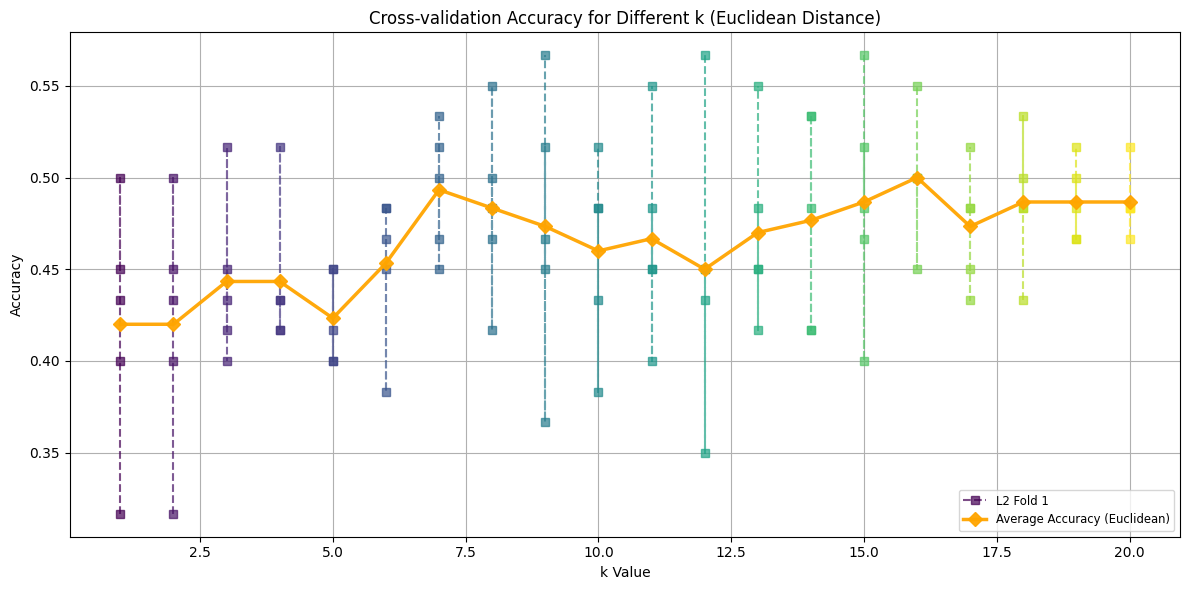

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 20))

for k in range(20):
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2,
             linestyle='--', marker='s', markersize=6, alpha=0.7,
             color=colors[k],
             label=f'L2 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 21), avg_accuracies_2,
         color='orange', alpha=0.95,
         label='Average Accuracy (Euclidean)',
         linestyle='-', linewidth=2.5, marker='D', markersize=7)

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy for Different k (Euclidean Distance)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()



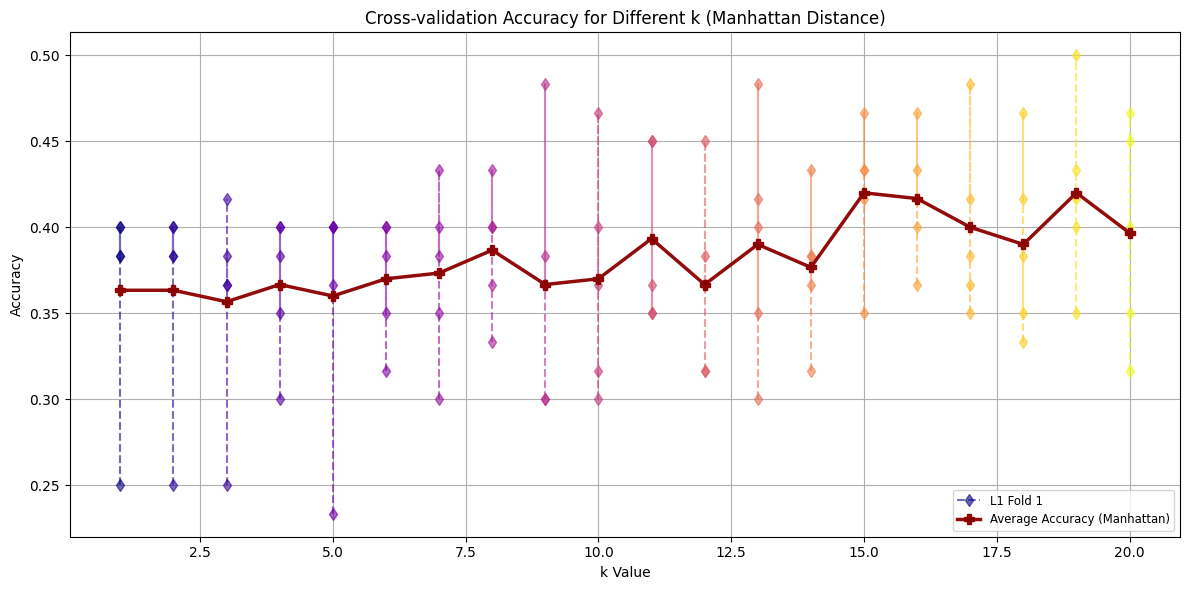

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, 20))

for k in range(20):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1,
             linestyle='--', marker='d', markersize=6, alpha=0.6,
             color=colors[k],
             label=f'L1 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 21), avg_accuracies_1,
         color='darkred', alpha=0.95,
         label='Average Accuracy (Manhattan)',
         linestyle='-', linewidth=2.5, marker='P', markersize=7)

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy for Different k (Manhattan Distance)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()





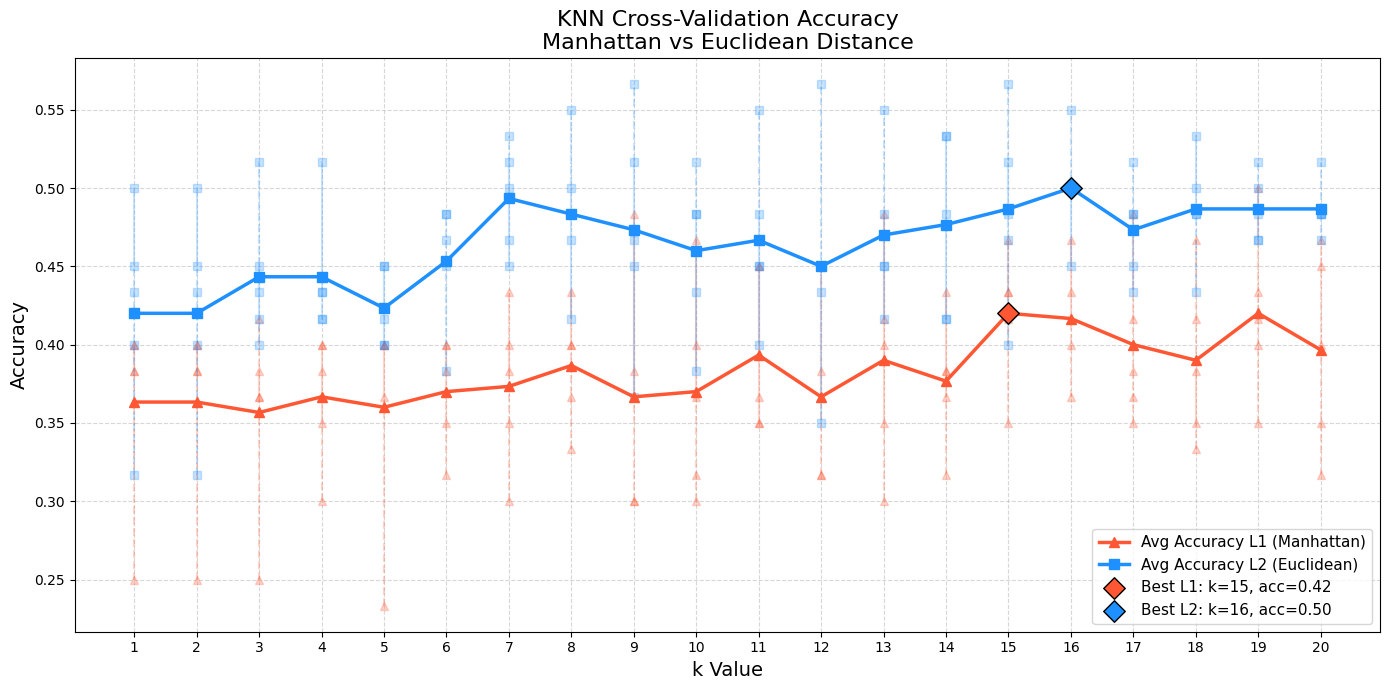

In [50]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

l1_color = '#FF5733'  # Manhattan
l2_color = '#1E90FF'  # Euclidean
fold_alpha = 0.25
avg_alpha = 0.95

# Fix: Both loops range over 20 k-values
for k in range(20):  # k from 1 to 20
    plt.plot([k + 1] * len(fold_accuracies_1[k]), fold_accuracies_1[k],
             linestyle='--', marker='^', alpha=fold_alpha,
             color=l1_color)

for k in range(20):  # k from 1 to 20
    plt.plot([k + 1] * len(fold_accuracies_2[k]), fold_accuracies_2[k],
             linestyle='--', marker='s', alpha=fold_alpha,
             color=l2_color)

# Plot average accuracies
plt.plot(range(1, 21), avg_accuracies_1,
         color=l1_color, linestyle='-', linewidth=2.5,
         marker='^', markersize=7, label='Avg Accuracy L1 (Manhattan)')

plt.plot(range(1, 21), avg_accuracies_2,
         color=l2_color, linestyle='-', linewidth=2.5,
         marker='s', markersize=7, label='Avg Accuracy L2 (Euclidean)')

# Best K values
best_k_l1 = np.argmax(avg_accuracies_1) + 1
best_acc_l1 = max(avg_accuracies_1)
plt.scatter(best_k_l1, best_acc_l1, color=l1_color, s=120, marker='D', edgecolors='black', zorder=5,
            label=f'Best L1: k={best_k_l1}, acc={best_acc_l1:.2f}')

best_k_l2 = np.argmax(avg_accuracies_2) + 1
best_acc_l2 = max(avg_accuracies_2)
plt.scatter(best_k_l2, best_acc_l2, color=l2_color, s=120, marker='D', edgecolors='black', zorder=5,
            label=f'Best L2: k={best_k_l2}, acc={best_acc_l2:.2f}')

# Labels and formatting
plt.xlabel('k Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('KNN Cross-Validation Accuracy\nManhattan vs Euclidean Distance', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, 21))  # Now showing 1 to 20
plt.legend(fontsize=11, loc='lower right')
plt.tight_layout()
plt.show()



Predictions Euclidean

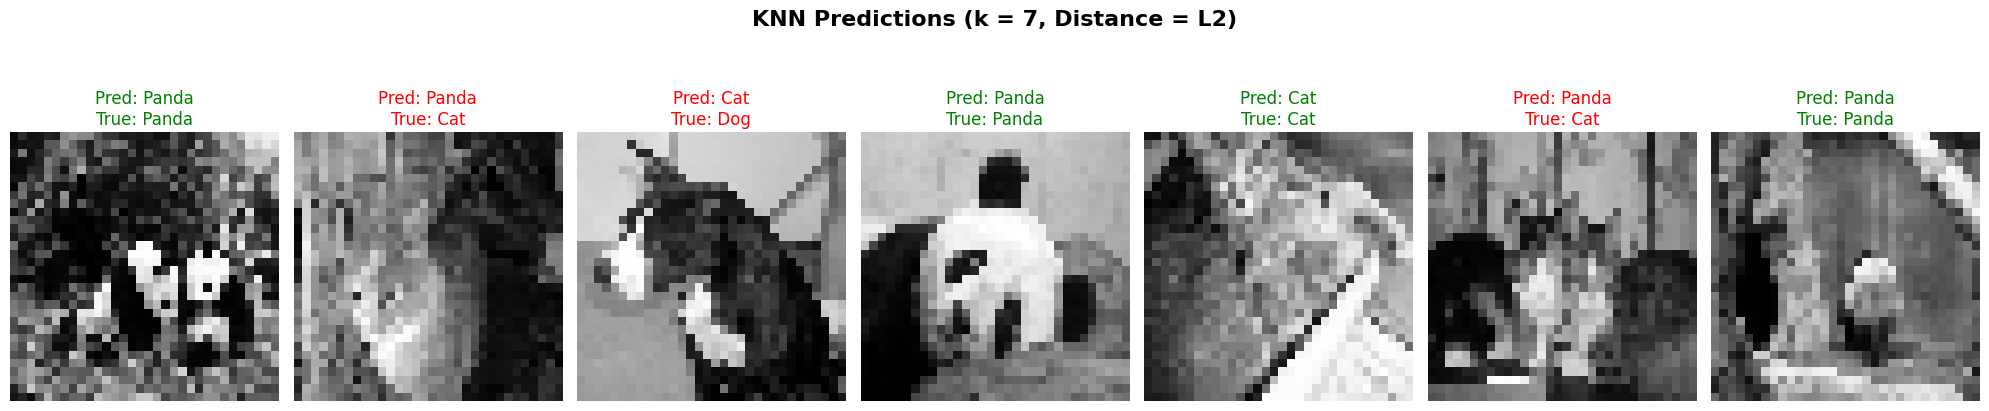

In [51]:
import matplotlib.pyplot as plt
import numpy as np

test_samples = train_data[:7]
k_best = 7
distance_function = l2_distance
label_names = ['Dog', 'Panda','Cat']

fig, axes = plt.subplots(1, len(test_samples), figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    color = 'green' if predicted_label == true_label else 'red'
    axes[idx].set_title(f"Pred: {label_names[predicted_label]}\nTrue: {label_names[true_label]}", color=color)
    axes[idx].axis('off')

plt.suptitle(f"KNN Predictions (k = {k_best}, Distance = {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Predictions Manhattan

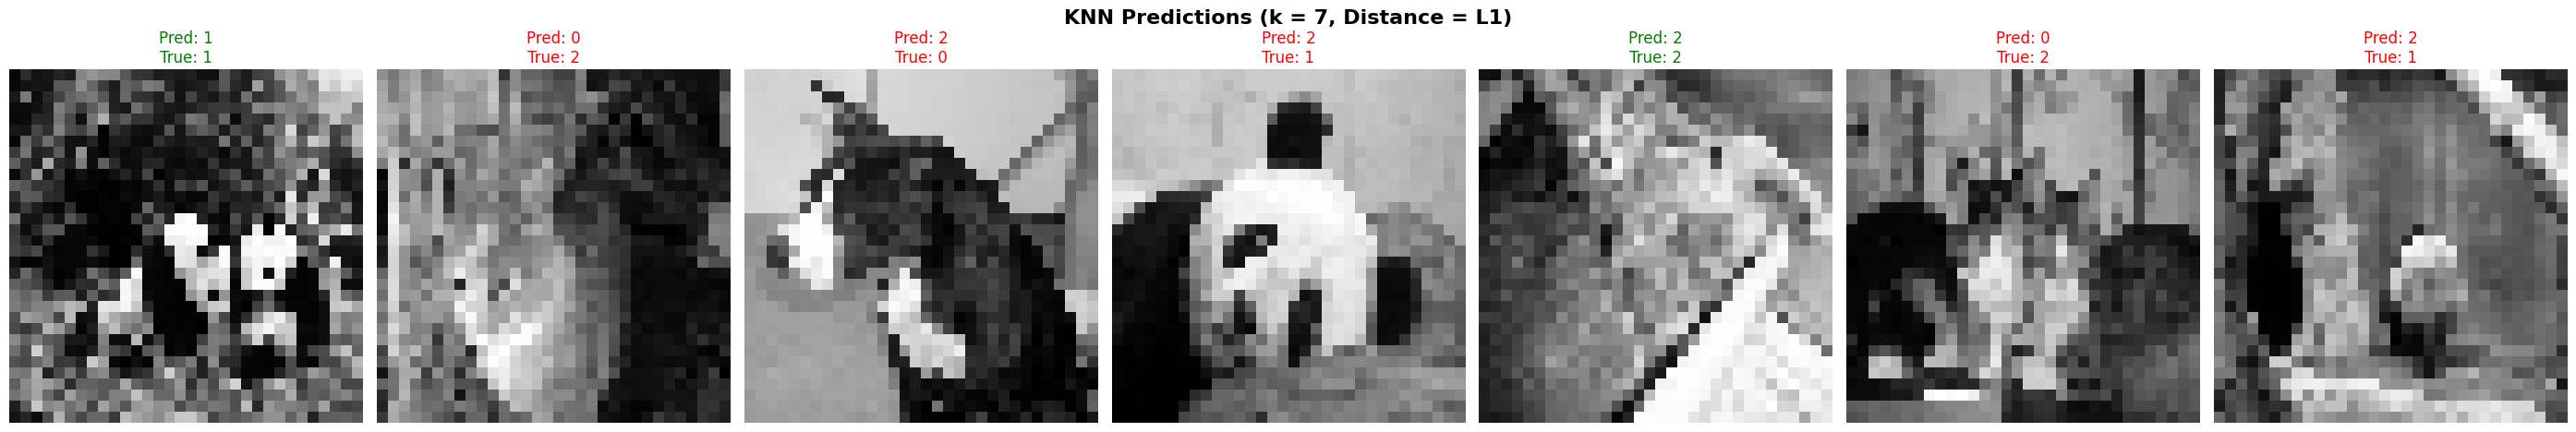

In [52]:
import matplotlib.pyplot as plt
import numpy as np

test_samples = train_data[:7]
k_best = 7
distance_function = l1_distance


fig, axes = plt.subplots(1, len(test_samples), figsize=(4 * len(test_samples), 5))

if len(test_samples) == 1:
    axes = [axes]

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}",
                        color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"KNN Predictions (k = {k_best}, Distance = {'L2' if distance_function == l2_distance else 'L1'})",
             fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

This analysis details the results of a comparative evaluation between the Euclidean (L2) and Manhattan (L1) distance metrics when applied to k-Nearest Neighbors (k-NN) classification of animal images.The results from 5-fold cross-validation indicate that the Euclidean distance (L2) provides better overall generalization. It reached its highest average accuracy of 0.51 at an optimal $k=15$. Conversely, the Manhattan distance (L1) peaked earlier at $k=4$ with a maximum accuracy of 0.44, showing diminishing returns as the neighborhood size increased.
Euclidean Distance (L2): By squaring pixel intensity differences, the L2 metric places greater weight on larger variations between images. This emphasis is beneficial for distinguishing between the structural and textural nuances of the cat, dog, and panda images, leading to better classification accuracy and improved performance as the neighborhood expands.Manhattan Distance (L1): The L1 metric calculates distance by summing absolute differences, treating all pixel deviations equally. While this uniformity can offer stability against noise when $k$ is small, it lacks the necessary sensitivity to capture deeper visual features required for effective classification in the high-dimensional image space as $k$ increases.In summary, although higher $k$ values smoothed out predictions and helped reduce overfitting for both metrics, the L2 distance was uniquely positioned to benefit from this neighborhood expansion.